In [ ]:
!pip install download

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from download import download
import plotly.express as px

In [ ]:
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [ ]:
# Provide the URL of the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/JudahZammit/Comp4190A2/master/PRSA_Data_Dingling_20130301-20170228.csv"

df = pd.read_csv(url)
df.head()


No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [ ]:
# !ls -alrt /tmp/aq/PRSA_Data_Dingling_20130301-20170228

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
url = "https://raw.githubusercontent.com/JudahZammit/Comp4190A2/master/PRSA_Data_Dingling_20130301-20170228.csv"

date_df = pd.read_csv(url, parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date, keep_date_col=True)

In [ ]:
date_df.head()

year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [ ]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [ ]:
date_df['month'] = pd.to_numeric(date_df['month'])

In [ ]:
print("Rows :", date_df.shape[0])
print("Columns :", date_df.shape[1])
print("\nMissing Value: ", date_df.columns.tolist())
print("\nUnique Values: \n", date_df.nunique())

Rows : 35064
Columns : 19

Missing Value:  ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Unique Values: 
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM10                     554
SO2                      327
NO2                      636
CO                       103
O3                       792
TEMP                     998
PRES                     593
DEWP                     602
RAIN                     116
wd                        16
WSPM                      95
station                    1
dtype: int64


In [ ]:
date_df.describe()

No         month         PM2.5          PM10           SO2  \
count  35064.000000  35064.000000  34285.000000  34408.000000  34334.000000   
mean   17532.500000      6.522930     65.989497     83.739723     11.749650   
std    10122.249256      3.448752     72.267723     79.541685     15.519259   
min        1.000000      1.000000      3.000000      2.000000      0.285600   
25%     8766.750000      4.000000     14.000000     26.000000      2.000000   
50%    17532.500000      7.000000     41.000000     60.000000      5.000000   
75%    26298.250000     10.000000     93.000000    117.000000     15.000000   
max    35064.000000     12.000000    881.000000    905.000000    156.000000   

                NO2            CO            O3          TEMP          PRES  \
count  33830.000000  33052.000000  33850.000000  35011.000000  35014.000000   
mean      27.585467    904.896073     68.548371     13.686111   1007.760278   
std       26.383882    903.306220     53.764424     11.365313     10.225664   
min        1.026500    100.000000      0.214200    -16.600000    982.400000   
25%        9.000000    300.000000     31.000000      3.400000    999.300000   
50%       19.000000    600.000000     61.000000     14.700000   1007.400000   
75%       38.000000   1200.000000     90.000000     23.300000   1016.000000   
max      205.000000  10000.000000    500.000000     41.400000   1036.500000   

               DEWP          RAIN          WSPM  
count  35011.000000  35013.000000  35021.000000  
mean       1.505495      0.060366      1.853836  
std       13.822099      0.752899      1.309808  
min      -35.100000      0.000000      0.000000  
25%      -10.200000      0.000000      1.000000  
50%        1.800000      0.000000      1.500000  
75%       14.200000      0.000000      2.300000  
max       27.200000     52.100000     10.000000

In [ ]:
date_non_index = date_df.copy()

In [ ]:
date_df.set_index("year_month_day_hour")

No  year  month day hour  PM2.5  PM10  SO2  NO2  \
year_month_day_hour                                                       
2013-03-01 00:00:00      1  2013      3   1    0    4.0   4.0  3.0  NaN   
2013-03-01 01:00:00      2  2013      3   1    1    7.0   7.0  3.0  NaN   
2013-03-01 02:00:00      3  2013      3   1    2    5.0   5.0  3.0  2.0   
2013-03-01 03:00:00      4  2013      3   1    3    6.0   6.0  3.0  NaN   
2013-03-01 04:00:00      5  2013      3   1    4    5.0   5.0  3.0  NaN   
...                    ...   ...    ...  ..  ...    ...   ...  ...  ...   
2017-02-28 19:00:00  35060  2017      2  28   19   11.0  11.0  2.0  2.0   
2017-02-28 20:00:00  35061  2017      2  28   20   13.0  13.0  2.0  2.0   
2017-02-28 21:00:00  35062  2017      2  28   21    9.0  14.0  2.0  2.0   
2017-02-28 22:00:00  35063  2017      2  28   22   10.0  12.0  2.0  2.0   
2017-02-28 23:00:00  35064  2017      2  28   23   13.0  16.0  4.0  9.0   

                        CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00  200.0   82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00  200.0   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00  200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00  200.0   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00  200.0   81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                    ...    ...   ...     ...   ...   ...  ...   ...   
2017-02-28 19:00:00  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3   
2017-02-28 20:00:00  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1   
2017-02-28 21:00:00  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5   
2017-02-28 22:00:00  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4   
2017-02-28 23:00:00  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2017-02-28 19:00:00  Dingling  
2017-02-28 20:00:00  Dingling  
2017-02-28 21:00:00  Dingling  
2017-02-28 22:00:00  Dingling  
2017-02-28 23:00:00  Dingling  

[35064 rows x 18 columns]

In [ ]:
date_df.index

RangeIndex(start=0, stop=35064, step=1)

In [ ]:
date_df.head()

year_month_day_hour  No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [ ]:
date_df['year_month_day_hour'] = pd.to_datetime(date_df['year_month_day_hour'])  # Convert the column to datetime format
date_df.set_index('year_month_day_hour', inplace=True)

In [ ]:
date_df.loc['2013-03-01':'2013-03-05']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                        
2013-03-01 00:00:00    1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00    2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00    3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00    4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00    5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                  ...   ...    ...  ..  ...    ...    ...   ...   ...   
2013-03-05 19:00:00  116  2013      3   5   19  179.0  200.0  50.0  96.0   
2013-03-05 20:00:00  117  2013      3   5   20  172.0  180.0  43.0  94.0   
2013-03-05 21:00:00  118  2013      3   5   21  179.0  191.0  38.0  80.0   
2013-03-05 22:00:00  119  2013      3   5   22  173.0  168.0  39.0  73.0   
2013-03-05 23:00:00  120  2013      3   5   23  170.0  162.0  42.0  72.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2013-03-05 19:00:00  1600.0  82.0   7.7  1005.4  -7.6   0.0  NNE   0.2   
2013-03-05 20:00:00  1899.0  82.0   6.3  1005.9  -7.3   0.0  NNE   0.7   
2013-03-05 21:00:00  1700.0  82.0   5.6  1006.0  -7.3   0.0  NNE   0.2   
2013-03-05 22:00:00  1800.0  82.0   4.9  1005.8  -7.0   0.0    N   1.7   
2013-03-05 23:00:00  1700.0  82.0   3.7  1005.7  -6.9   0.0   NE   0.4   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2013-03-05 19:00:00  Dingling  
2013-03-05 20:00:00  Dingling  
2013-03-05 21:00:00  Dingling  
2013-03-05 22:00:00  Dingling  
2013-03-05 23:00:00  Dingling  

[120 rows x 18 columns]

In [ ]:
date_df.loc['2015':'2020']

No  year  month day hour  PM2.5  PM10  SO2  NO2  \
year_month_day_hour                                                       
2015-01-01 00:00:00  16105  2015      1   1    0    NaN   NaN  NaN  NaN   
2015-01-01 01:00:00  16106  2015      1   1    1    NaN   NaN  NaN  NaN   
2015-01-01 02:00:00  16107  2015      1   1    2    NaN   NaN  NaN  NaN   
2015-01-01 03:00:00  16108  2015      1   1    3    NaN   NaN  NaN  NaN   
2015-01-01 04:00:00  16109  2015      1   1    4    NaN   NaN  NaN  NaN   
...                    ...   ...    ...  ..  ...    ...   ...  ...  ...   
2017-02-28 19:00:00  35060  2017      2  28   19   11.0  11.0  2.0  2.0   
2017-02-28 20:00:00  35061  2017      2  28   20   13.0  13.0  2.0  2.0   
2017-02-28 21:00:00  35062  2017      2  28   21    9.0  14.0  2.0  2.0   
2017-02-28 22:00:00  35063  2017      2  28   22   10.0  12.0  2.0  2.0   
2017-02-28 23:00:00  35064  2017      2  28   23   13.0  16.0  4.0  9.0   

                        CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2015-01-01 00:00:00    NaN    NaN  -4.0  1025.0 -23.7   0.0   NW   3.3   
2015-01-01 01:00:00    NaN    NaN  -2.0  1022.0 -22.6   0.0  NNE   1.2   
2015-01-01 02:00:00    NaN    NaN  -5.0  1022.0 -23.5   0.0  NNW   1.7   
2015-01-01 03:00:00    NaN    NaN  -5.0  1023.0 -23.5   0.0    N   1.7   
2015-01-01 04:00:00    NaN    NaN  -5.0  1024.0 -24.0   0.0   NE   1.8   
...                    ...    ...   ...     ...   ...   ...  ...   ...   
2017-02-28 19:00:00  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3   
2017-02-28 20:00:00  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1   
2017-02-28 21:00:00  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5   
2017-02-28 22:00:00  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4   
2017-02-28 23:00:00  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9   

                      station  
year_month_day_hour            
2015-01-01 00:00:00  Dingling  
2015-01-01 01:00:00  Dingling  
2015-01-01 02:00:00  Dingling  
2015-01-01 03:00:00  Dingling  
2015-01-01 04:00:00  Dingling  
...                       ...  
2017-02-28 19:00:00  Dingling  
2017-02-28 20:00:00  Dingling  
2017-02-28 21:00:00  Dingling  
2017-02-28 22:00:00  Dingling  
2017-02-28 23:00:00  Dingling  

[18960 rows x 18 columns]

In [ ]:
 pm_data = date_df['PM2.5']
 pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='year_month_day_hour'>

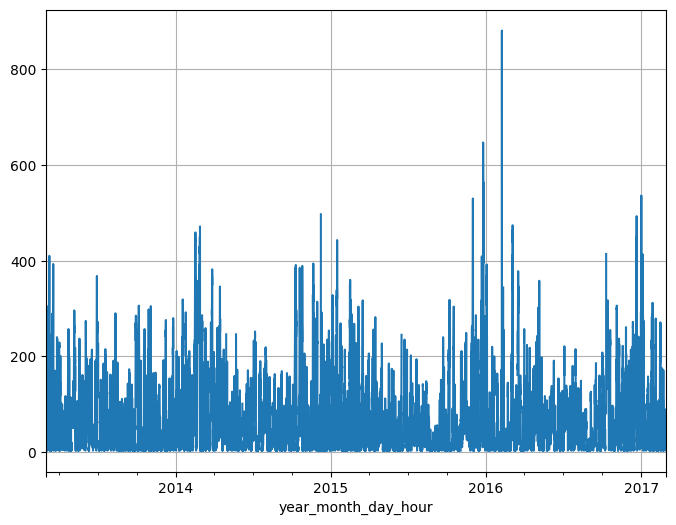

In [ ]:
pm_data.plot(grid=True, kind='line')

<Axes: xlabel='year_month_day_hour'>

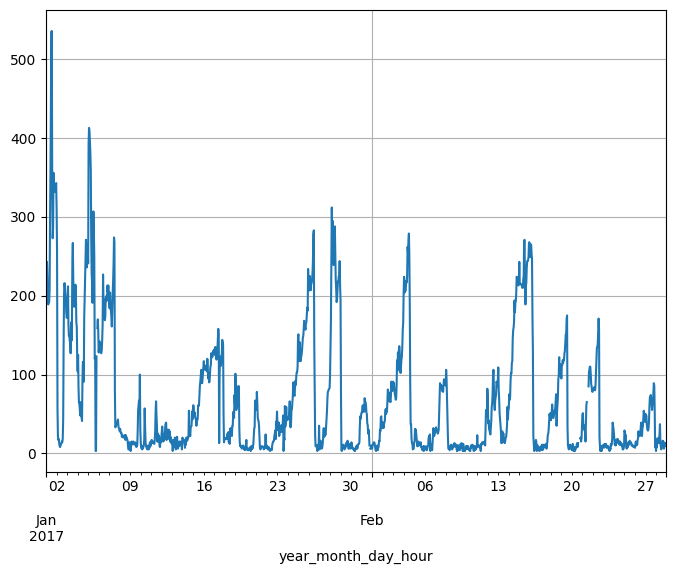

In [ ]:
date_df_2020 = date_df.loc['2017']
pm_data_2020 = date_df_2020['PM2.5']
pm_data_2020.plot(grid=True)

In [ ]:
fig = px.line(date_non_index, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.line(df, x=df.index, y='PM2.5', title='PM2.5 Over Time', labels={'PM2.5': 'PM2.5 concentration'})

# Customizing the layout
fig.update_layout(
    xaxis_title='Date and Time',
    yaxis_title='PM2.5 Concentration (µg/m³)',
    template='plotly_dark',
    legend_title='Legend',
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:

fig = px.line(df, x=df.index, y='PM2.5', title='PM2.5 Over Time', labels={'PM2.5': 'PM2.5 concentration'})

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),  # Monthly
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),   # Yearly
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)


fig.show()

In [ ]:
df_2014 = date_df['2014'].reset_index()
df_2015 = date_df['2015'].reset_index()

df_2014['month_day_hour'] = df_2014.apply(lambda x: f"{x['month']}-{x['day']}-{x['hour']}", axis=1)
df_2015['month_day_hour'] = df_2015.apply(lambda x: f"{x['month']}-{x['day']}-{x['hour']}", axis=1)

fig = px.line(df_2014, x='month_day_hour', y='PM2.5', title='PM2.5 Over Time - 2014', labels={'PM2.5': 'PM2.5 concentration'})
fig.add_trace(px.line(df_2015, x='month_day_hour', y='PM2.5', title='PM2.5 Over Time - 2015', labels={'PM2.5': 'PM2.5 concentration'}).data[0])

fig.update_layout(
    xaxis_title='Month-Day-Hour',
    yaxis_title='PM2.5 Concentration (µg/m³)',
    template='plotly_dark',
    legend_title='Legend',
)

fig.show()


<ipython-input-49-3187c726a666>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-49-3187c726a666>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [50]:
date_df['2013':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2956.0  84.098038   88.475610  3.0  13.0  52.0  130.25  474.0
4      2812.0  64.755974   56.796499  3.0  19.0  51.0   91.00  346.0
5      2894.0  53.704803   49.005236  3.0  17.0  41.0   75.00  358.0
6      2835.0  56.471182   53.692955  3.0  16.0  38.0   84.00  368.0
7      2915.0  59.806038   50.397464  3.0  20.0  45.0   89.00  252.0
8      2950.0  43.490136   39.320892  3.0  14.0  30.0   64.75  290.0
9      2790.0  49.931039   49.810494  3.0  12.0  31.0   80.00  285.0
10     2785.0  80.305925   88.636177  3.0  14.0  42.0  120.00  414.0
11     2861.0  69.901713   69.473950  3.0  15.0  49.0  102.00  394.0
12     2929.0  78.821441   96.614576  3.0  11.0  42.0  116.00  647.0

In [52]:
date_df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP':['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

<ipython-input-53-855db50e7fb8>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

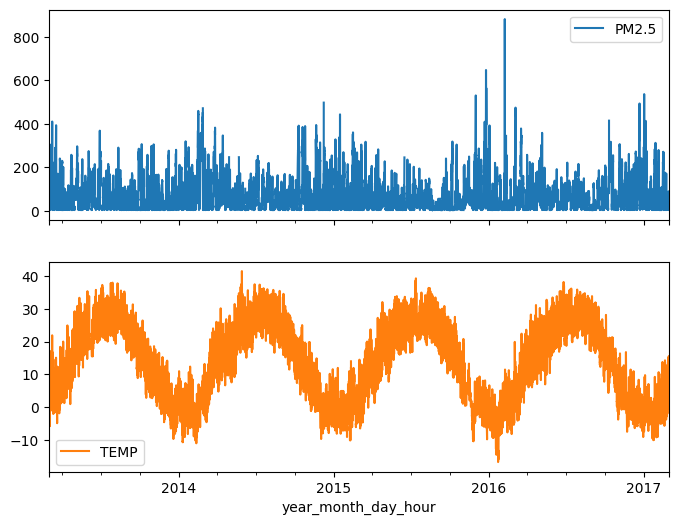

In [53]:
date_df_2015=date_df['2015']
pm_data_2015=date_df[['PM2.5', 'TEMP']]
pm_data_2015.plot(subplots=True)

<ipython-input-54-944f91f8d82a>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



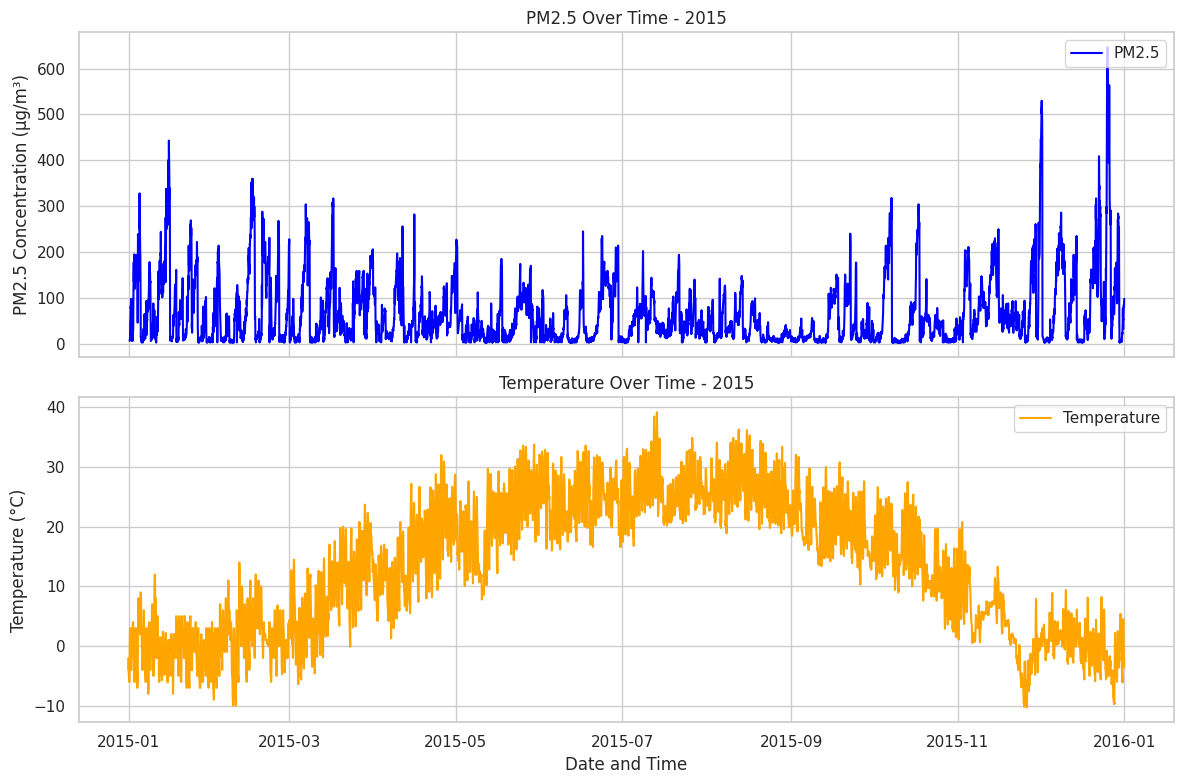

In [54]:

date_df_2015 = date_df['2015'][['PM2.5', 'TEMP']]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Plot PM2.5
sns.lineplot(x=date_df_2015.index, y=date_df_2015['PM2.5'], ax=axes[0], color='blue', label='PM2.5')
axes[0].set_title('PM2.5 Over Time - 2015')
axes[0].set_ylabel('PM2.5 Concentration (µg/m³)')

# Plot Temperature
sns.lineplot(x=date_df_2015.index, y=date_df_2015['TEMP'], ax=axes[1], color='orange', label='Temperature')
axes[1].set_title('Temperature Over Time - 2015')
axes[1].set_xlabel('Date and Time')
axes[1].set_ylabel('Temperature (°C)')

# Add legend
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')

plt.tight_layout()

plt.show()

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'TEMP'}>]], dtype=object)

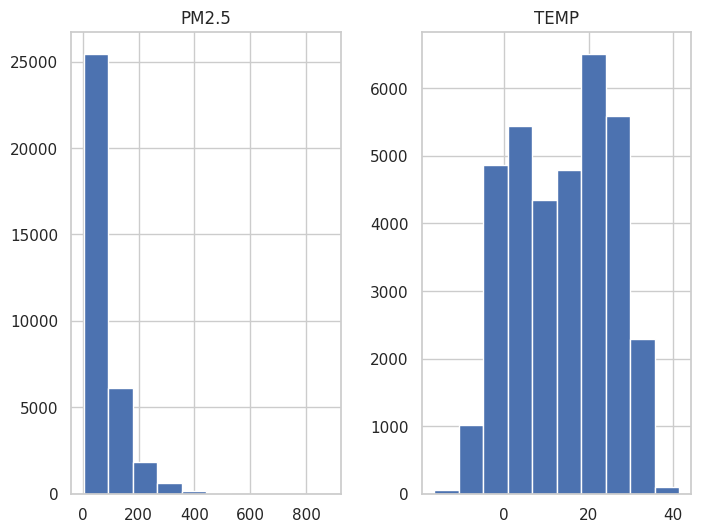

In [56]:
date_df[['PM2.5', 'TEMP']].hist()

In [58]:
date_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

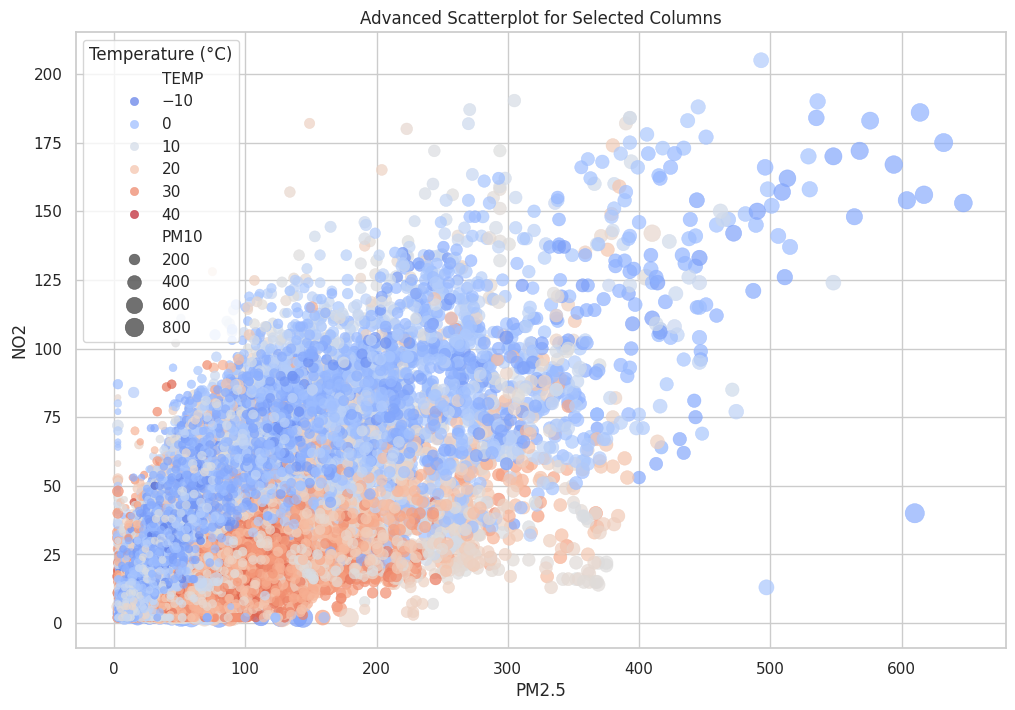

In [59]:

selected_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'TEMP']
selected_data = df[selected_columns]

plt.figure(figsize=(12, 8))

# scatterplot with color gradient based on 'TEMP'
scatter = sns.scatterplot(x='PM2.5', y='NO2', hue='TEMP', size='PM10', sizes=(20, 200),
                          palette='coolwarm', data=selected_data, alpha=0.7, edgecolor=None)


plt.title('Advanced Scatterplot for Selected Columns')
plt.xlabel('PM2.5')
plt.ylabel('NO2')

legend = plt.legend(title='Temperature (°C)', loc='upper left')
legend.set_title('Temperature (°C)')

plt.show()

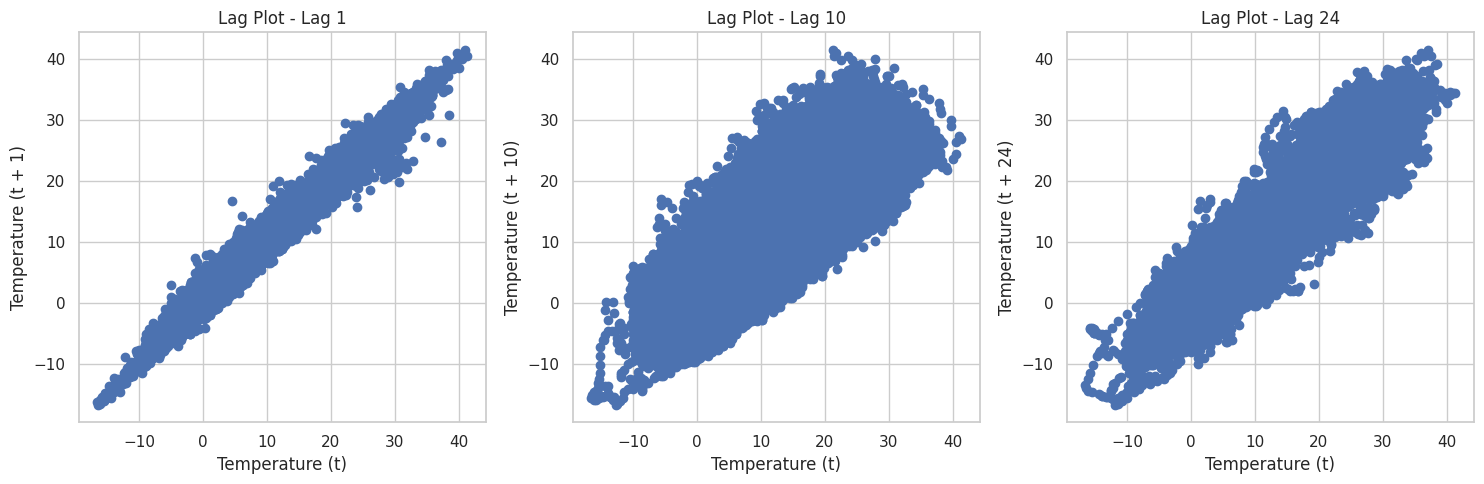

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Lag plot for lag=1
lag_plot(date_df['TEMP'], lag=1, ax=axes[0])
axes[0].set_title('Lag Plot - Lag 1')
axes[0].set_xlabel('Temperature (t)')
axes[0].set_ylabel('Temperature (t + 1)')

# Lag plot for lag=10
lag_plot(date_df['TEMP'], lag=10, ax=axes[1])
axes[1].set_title('Lag Plot - Lag 10')
axes[1].set_xlabel('Temperature (t)')
axes[1].set_ylabel('Temperature (t + 10)')

# Lag plot for lag=24
lag_plot(date_df['TEMP'], lag=24, ax=axes[2])
axes[2].set_title('Lag Plot - Lag 24')
axes[2].set_xlabel('Temperature (t)')
axes[2].set_ylabel('Temperature (t + 24)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<Axes: ylabel='Density'>

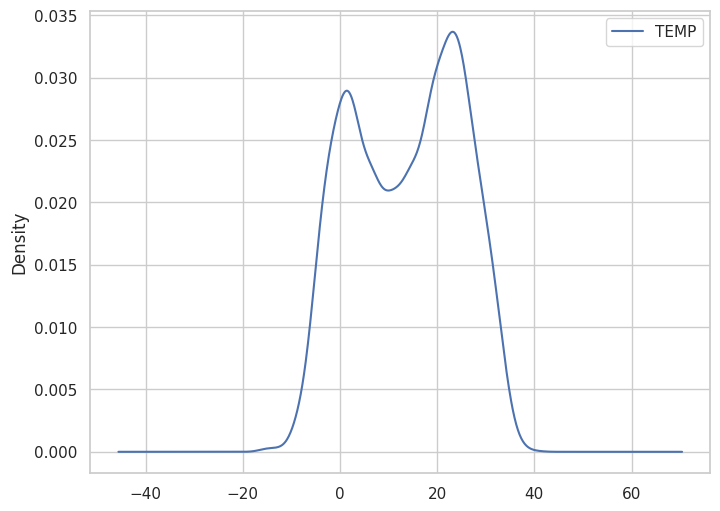

In [66]:
date_df[['TEMP']].plot(kind='density')

<ipython-input-67-0c067d10f478>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

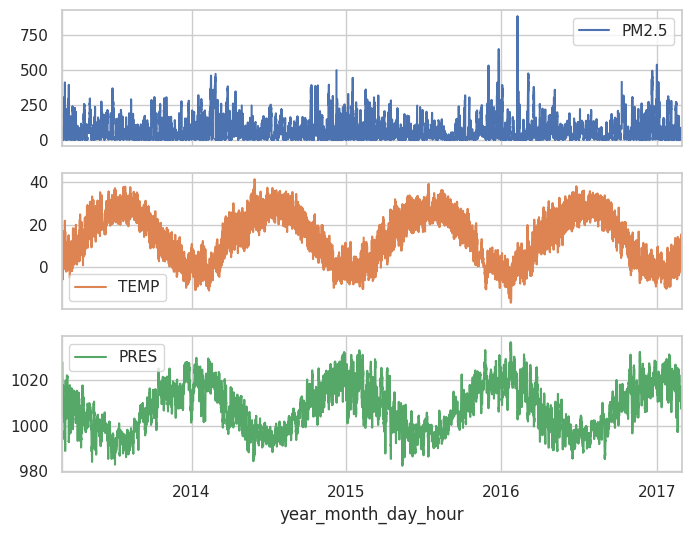

In [67]:
date_df_2015=date_df['2015']
pm_data_2015=date_df[['PM2.5', 'TEMP', 'PRES']]
pm_data_2015.plot(subplots=True)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

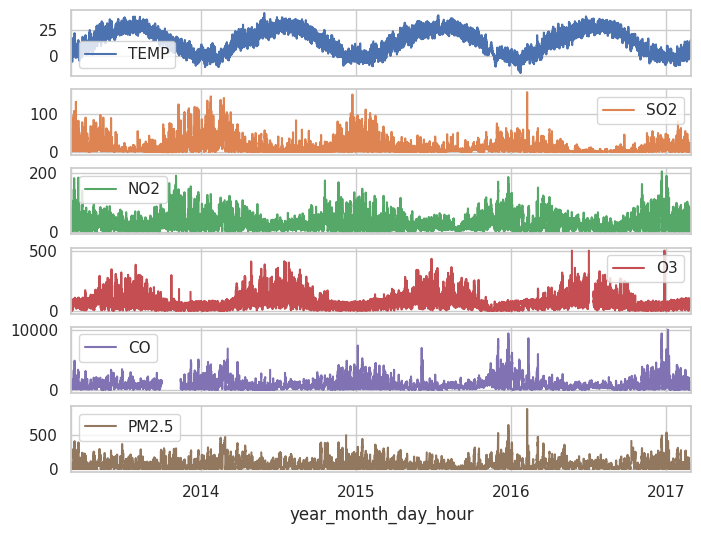

In [69]:
gases_data=date_df[['TEMP', 'SO2', 'NO2', 'O3', 'CO', 'PM2.5']]
gases_data.plot(subplots=True)


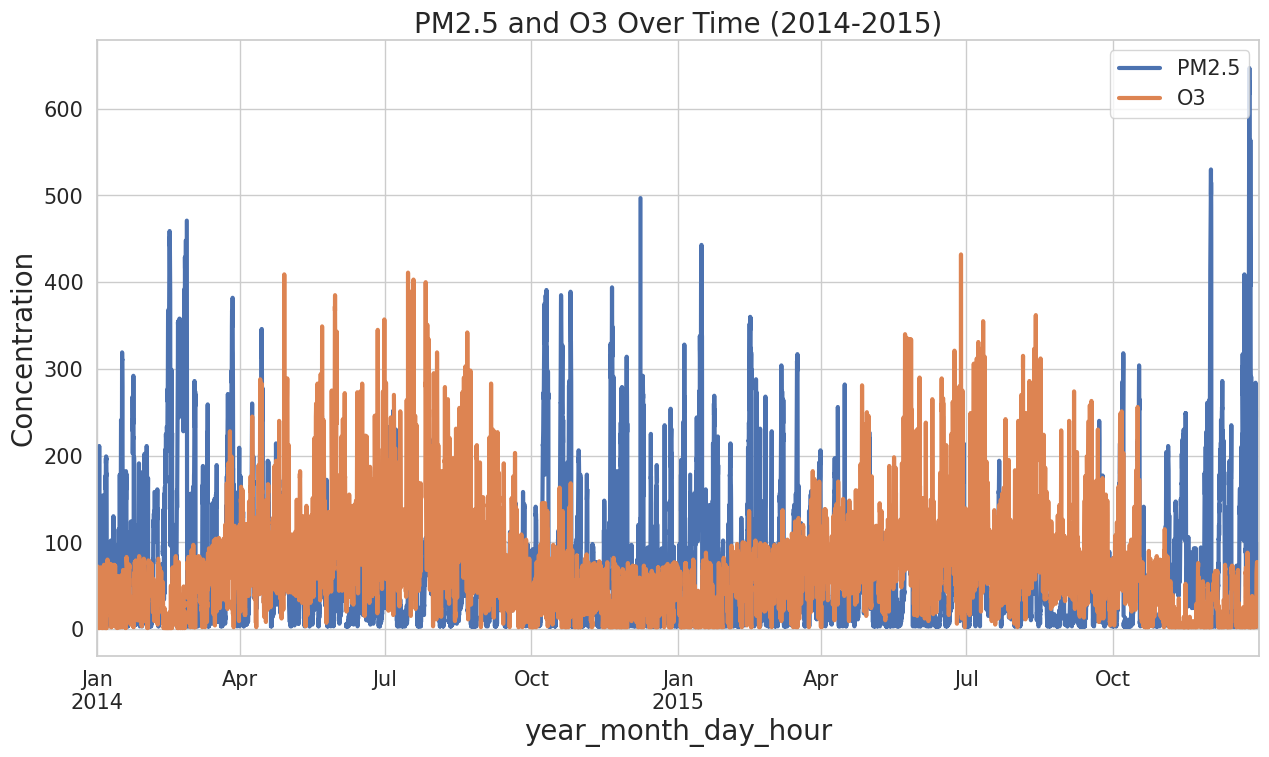

In [72]:
date_df['2014':'2015'][['PM2.5', 'O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20)
plt.ylabel('Concentration', fontsize=20)
plt.title('PM2.5 and O3 Over Time (2014-2015)', fontsize=20)
plt.legend(fontsize=15)
plt.show()


In [73]:
date_df.isnull().values.any()

True

In [74]:
date_df.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [75]:
date_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

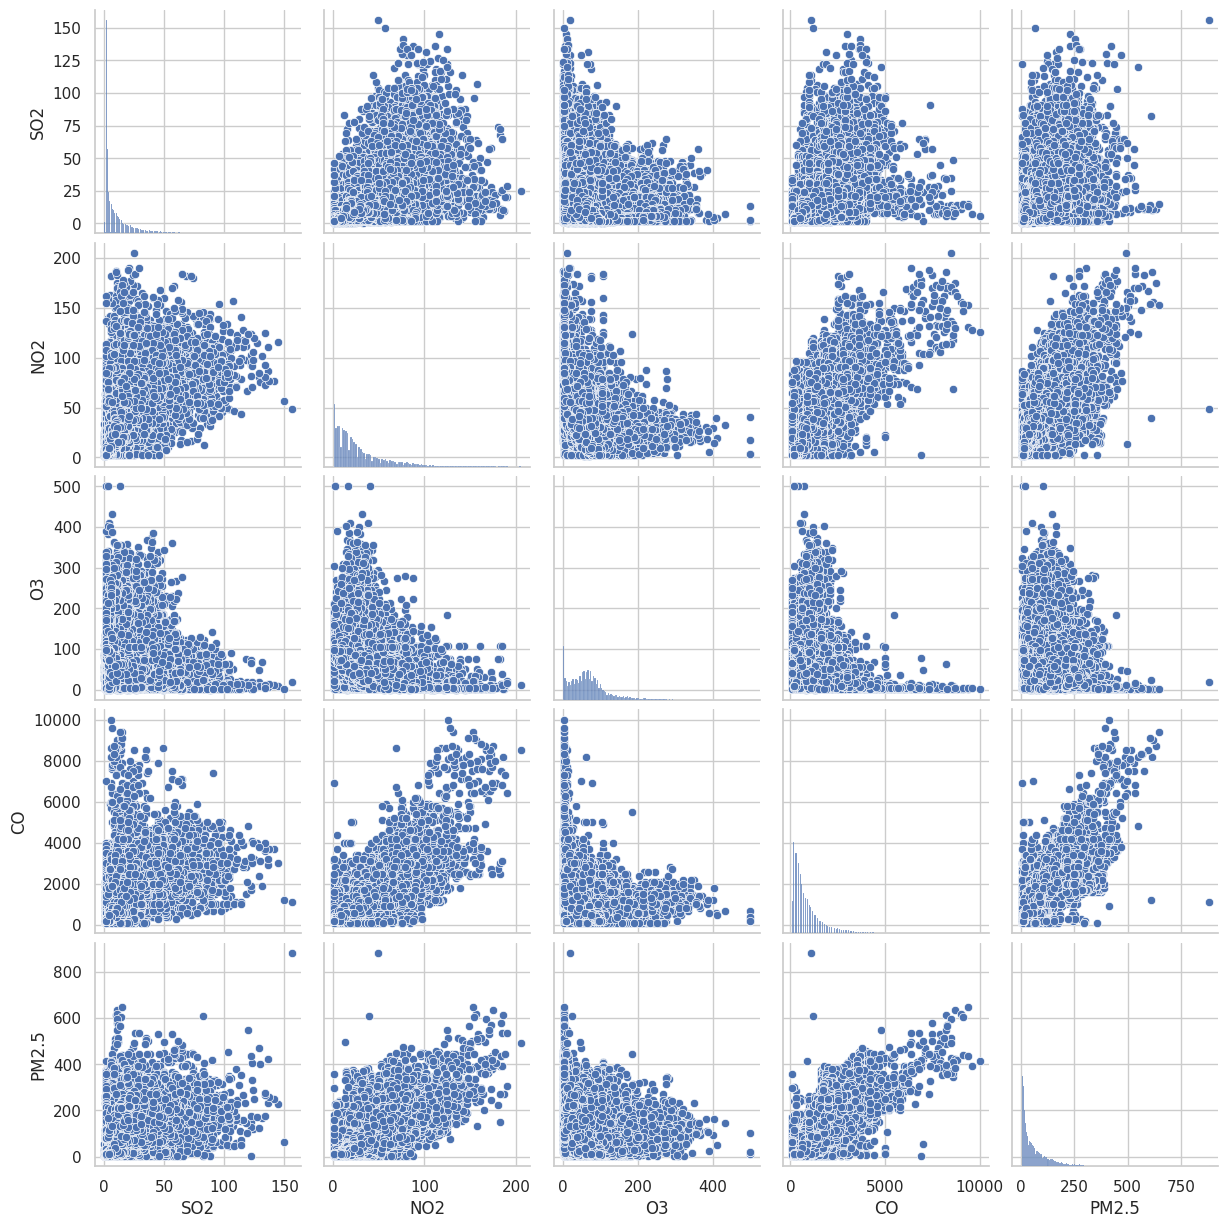

In [76]:
g = sns.pairplot(date_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']])

In [78]:
date_corr = date_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr(method='pearson')
date_corr

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

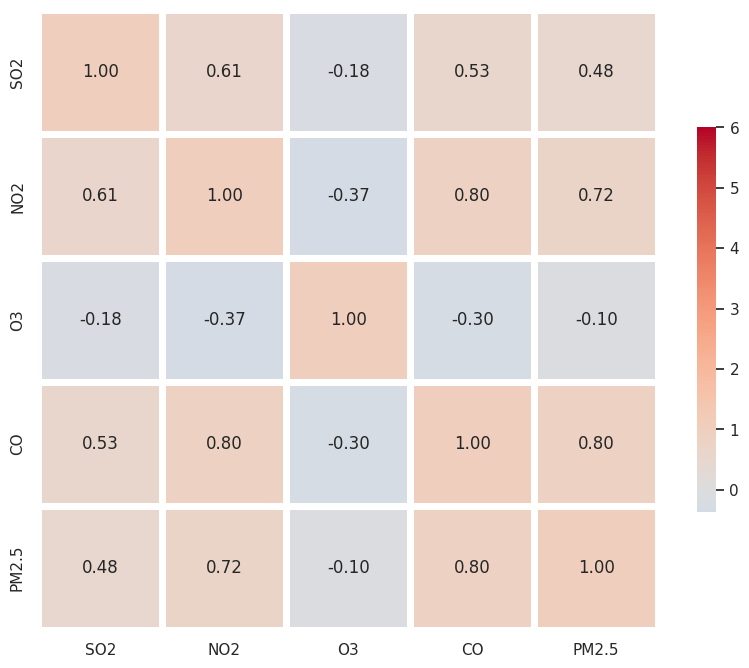

In [84]:
g = sns.heatmap(date_corr, vmax=6, center=0, square=True, linewidth=5,
                cbar_kws={'shrink': .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
plt.show()

In [85]:
date_df.groupby('wd').agg(median=('PM2.5', 'median'), mean=('PM2.5', 'mean'), max=('PM2.5', 'max'), min=('PM2.5', 'min')).reset_index()

wd  median       mean    max  min
0     E    70.0  88.623363  434.0  3.0
1   ENE    56.5  77.685514  647.0  3.0
2   ESE    78.5  96.492276  632.0  3.0
3     N    29.0  57.546221  536.0  3.0
4    NE    32.0  57.390083  530.0  3.0
5   NNE    26.0  53.946239  881.0  3.0
6   NNW    33.0  62.790775  548.0  3.0
7    NW    21.0  52.769116  535.0  3.0
8     S    52.0  72.497281  511.0  3.0
9    SE    70.0  85.045709  617.0  3.0
10  SSE    61.0  79.925967  614.0  3.0
11  SSW    50.0  73.078253  493.0  3.0
12   SW    46.0  70.233140  459.0  3.0
13    W    22.0  49.488104  446.0  3.0
14  WNW    14.0  37.307447  515.0  3.0
15  WSW    39.0  66.725926  451.0  3.0

# **Handling Missing Values**

In [86]:
date_df.query('TEMP != TEMP')

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2015-01-27 20:00:00  16749  2015      1  27   20   39.0   43.0  28.0  34.0   
2015-01-30 13:00:00  16814  2015      1  30   13   15.0   19.0  19.0   5.0   
2015-01-31 05:00:00  16830  2015      1  31    5    5.0   11.0  32.0   8.0   
2015-02-02 01:00:00  16874  2015      2   2    1   60.0   60.0  30.0  39.0   
2015-02-02 11:00:00  16884  2015      2   2   11  138.0  138.0  52.0  73.0   
2015-02-04 10:00:00  16931  2015      2   4   10    8.0    8.0  13.0   5.0   
2015-02-04 13:00:00  16934  2015      2   4   13   13.0   16.0  14.0   3.0   
2015-02-07 15:00:00  17008  2015      2   7   15    3.0   24.0   2.0   2.0   
2015-02-08 14:00:00  17031  2015      2   8   14    4.0    5.0   7.0   2.0   
2015-02-09 12:00:00  17053  2015      2   9   12   87.0   87.0  82.0  53.0   
2015-02-09 13:00:00  17054  2015      2   9   13   95.0   95.0  77.0  55.0   
2015-02-10 14:00:00  17079  2015      2  10   14   29.0   31.0  31.0  14.0   
2015-02-11 02:00:00  17091  2015      2  11    2   12.0   32.0   2.0   4.0   
2015-02-12 00:00:00  17113  2015      2  12    0    7.0   15.0   3.0   2.0   
2015-02-13 14:00:00  17151  2015      2  13   14  113.0  120.0  40.0  61.0   
2015-02-18 05:00:00  17262  2015      2  18    5    5.0    5.0   2.0   2.0   
2015-02-18 07:00:00  17264  2015      2  18    7    6.0   10.0   9.0   3.0   
2015-02-18 10:00:00  17267  2015      2  18   10   18.0   18.0  34.0   5.0   
2015-02-18 11:00:00  17268  2015      2  18   11   23.0   23.0  52.0   7.0   
2015-02-20 07:00:00  17312  2015      2  20    7  163.0  163.0   8.0  30.0   
2015-02-20 18:00:00  17323  2015      2  20   18  163.0  163.0  12.0  50.0   
2015-02-21 12:00:00  17341  2015      2  21   12  164.0  164.0  16.0  46.0   
2015-02-21 14:00:00  17343  2015      2  21   14  207.0  207.0  16.0  46.0   
2015-02-21 20:00:00  17349  2015      2  21   20   43.0  616.0   2.0   2.0   
2015-02-22 02:00:00  17355  2015      2  22    2  140.0  140.0   2.0   2.0   
2015-02-22 12:00:00  17365  2015      2  22   12   15.0  157.0   5.0   2.0   
2015-02-23 05:00:00  17382  2015      2  23    5   34.0   34.0  37.0  12.0   
2015-02-23 22:00:00  17399  2015      2  23   22   72.0  116.0  10.0  18.0   
2015-02-24 12:00:00  17413  2015      2  24   12  121.0  191.0  43.0  32.0   
2015-02-25 12:00:00  17437  2015      2  25   12   17.0   41.0   8.0   3.0   
2015-02-27 14:00:00  17487  2015      2  27   14   19.0   21.0  12.0  27.0   
2015-02-28 20:00:00  17517  2015      2  28   20  214.0  214.0   5.0  61.0   
2015-03-07 12:00:00  17677  2015      3   7   12  241.0  250.0  55.0  73.0   
2016-09-14 15:00:00  31048  2016      9  14   15  110.0  110.0   4.0  20.0   
2016-09-25 19:00:00  31316  2016      9  25   19  148.0  148.0   5.0  18.0   
2016-09-25 20:00:00  31317  2016      9  25   20  152.0  152.0   4.0  17.0   
2016-09-25 21:00:00  31318  2016      9  25   21  154.0  154.0   4.0  12.0   
2016-09-25 22:00:00  31319  2016      9  25   22  145.0  145.0   5.0  10.0   
2016-09-25 23:00:00  31320  2016      9  25   23  122.0  122.0   5.0  11.0   
2016-09-26 00:00:00  31321  2016      9  26    0  104.0  104.0   4.0   9.0   
2017-01-10 08:00:00  33873  2017      1  10    8   17.0   32.0   6.0  17.0   
2017-01-10 18:00:00  33883  2017      1  10   18    5.0   12.0   2.0   2.0   
2017-01-19 03:00:00  34084  2017      1  19    3   58.0   73.0  11.0  30.0   
2017-01-19 04:00:00  34085  2017      1  19    4   60.0   78.0  10.0  29.0   
2017-01-19 05:00:00  34086  2017      1  19    5   71.0  103.0  18.0  42.0   
2017-01-19 06:00:00  34087  2017      1  19    6   85.0  111.0  15.0  47.0   
2017-01-19 07:00:00  34088  2017      1  19    7   83.0   96.0  13.0  45.0   
2017-01-19 08:00:00  34089  2017      1  19    8   85.0  100.0  15.0  40.0   
2017-01-27 10:00:00  34283  2017      1  27   10   32.0   32.0  16.0  32.0   
2017-01-27 11:00:00  34284  2017      1  27   

In [87]:
date_df.query('TEMP != TEMP').count()

No         53
year       53
month      53
day        53
hour       53
PM2.5      53
PM10       53
SO2        53
NO2        53
CO         53
O3         53
TEMP        0
PRES        3
DEWP        0
RAIN        3
wd         10
WSPM       10
station    53
dtype: int64

In [88]:
date_df[date_df['PM2.5'].isnull()]

No  year  month day hour  PM2.5  PM10   SO2   NO2  CO  \
year_month_day_hour                                                             
2013-04-01 08:00:00    753  2013      4   1    8    NaN   NaN   NaN   NaN NaN   
2013-04-01 09:00:00    754  2013      4   1    9    NaN   NaN   NaN   NaN NaN   
2013-04-01 10:00:00    755  2013      4   1   10    NaN   NaN   NaN   NaN NaN   
2013-04-01 11:00:00    756  2013      4   1   11    NaN   NaN   NaN   NaN NaN   
2013-04-01 12:00:00    757  2013      4   1   12    NaN   NaN   NaN   NaN NaN   
...                    ...   ...    ...  ..  ...    ...   ...   ...   ...  ..   
2017-02-20 15:00:00  34864  2017      2  20   15    NaN   NaN   NaN   NaN NaN   
2017-02-20 16:00:00  34865  2017      2  20   16    NaN   NaN   NaN   NaN NaN   
2017-02-20 18:00:00  34867  2017      2  20   18    NaN   NaN   NaN   NaN NaN   
2017-02-21 11:00:00  34884  2017      2  21   11    NaN   NaN  26.0  68.0 NaN   
2017-02-21 13:00:00  34886  2017      2  21   13    NaN   NaN   NaN   NaN NaN   

                      O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                      
2013-04-01 08:00:00  NaN  11.0  1005.9  -3.2   0.0   NW   7.2  Dingling  
2013-04-01 09:00:00  NaN  10.6  1007.0  -3.5   0.0  NNW   4.5  Dingling  
2013-04-01 10:00:00  NaN  13.2  1007.8  -3.6   0.0  NNW   4.5  Dingling  
2013-04-01 11:00:00  NaN  13.8  1007.7  -4.9   0.0  NNE   4.0  Dingling  
2013-04-01 12:00:00  NaN  15.3  1007.9  -5.7   0.0   NE   5.0  Dingling  
...                  ...   ...     ...   ...   ...  ...   ...       ...  
2017-02-20 15:00:00  NaN   4.2  1022.0 -21.0   0.0  WNW   3.1  Dingling  
2017-02-20 16:00:00  NaN   4.4  1022.1 -21.7   0.0  WNW   3.4  Dingling  
2017-02-20 18:00:00  NaN   3.3  1022.2 -20.9   0.0   NE   1.1  Dingling  
2017-02-21 11:00:00  5.0  -0.5  1022.7 -16.0   0.0  ESE   1.9  Dingling  
2017-02-21 13:00:00  NaN  -1.0  1021.5  -9.4   0.0   SW   1.7  Dingling  

[779 rows x 18 columns]

In [89]:
date_df_na = date_df.copy()
date_df_na = date_df_na.dropna()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

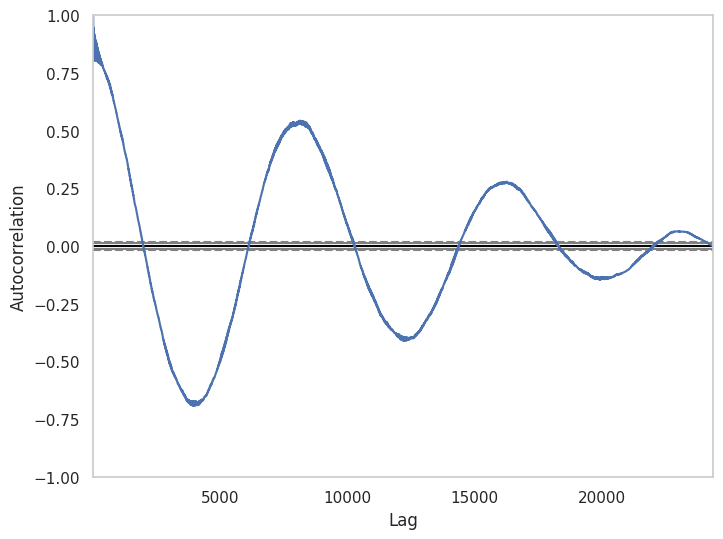

In [90]:
pd.plotting.autocorrelation_plot(date_df_na['2014':'2016']['TEMP'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

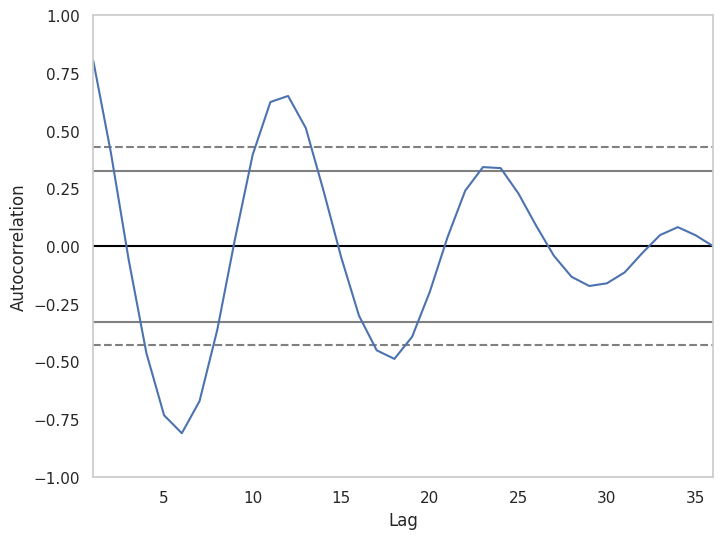

In [91]:
pd.plotting.autocorrelation_plot(date_df_na['2014':'2016']['TEMP'].resample('1m').mean())

In [92]:
date_df['2015-02-21 10':'2015-02-21 20']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2015-02-21 10:00:00  17339  2015      2  21   10  171.0  171.0  16.0  48.0   
2015-02-21 11:00:00  17340  2015      2  21   11  172.0  172.0  16.0  45.0   
2015-02-21 12:00:00  17341  2015      2  21   12  164.0  164.0  16.0  46.0   
2015-02-21 13:00:00  17342  2015      2  21   13  175.0  175.0  16.0  46.0   
2015-02-21 14:00:00  17343  2015      2  21   14  207.0  207.0  16.0  46.0   
2015-02-21 15:00:00  17344  2015      2  21   15  231.0  231.0  18.0  40.0   
2015-02-21 16:00:00  17345  2015      2  21   16    3.0  114.0   7.0   5.0   
2015-02-21 17:00:00  17346  2015      2  21   17   24.0  227.0   2.0   3.0   
2015-02-21 18:00:00  17347  2015      2  21   18   40.0  351.0   2.0   2.0   
2015-02-21 19:00:00  17348  2015      2  21   19   35.0  410.0   2.0   2.0   
2015-02-21 20:00:00  17349  2015      2  21   20   43.0  616.0   2.0   2.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2015-02-21 10:00:00  2400.0   6.0   1.0  1005.0  -1.1   0.0   SW   1.1   
2015-02-21 11:00:00  2200.0  13.0   1.0  1006.0  -0.9   0.0  SSW   1.2   
2015-02-21 12:00:00  2100.0  14.0   NaN     NaN   NaN   NaN  NaN   NaN   
2015-02-21 13:00:00  2200.0  15.0   2.0  1006.0  -0.3   0.0   SW   1.6   
2015-02-21 14:00:00  2300.0  17.0   NaN     NaN   NaN   NaN  NaN   NaN   
2015-02-21 15:00:00  2200.0  32.0   4.0  1004.0  -8.7   0.0    W   9.6   
2015-02-21 16:00:00  1100.0  88.0   4.0  1005.0 -12.5   0.0   NW   9.0   
2015-02-21 17:00:00  1800.0  91.0   3.0  1009.0 -16.7   0.0  WNW   6.4   
2015-02-21 18:00:00  1800.0  97.0   2.0  1010.0 -21.3   0.0   NW   7.3   
2015-02-21 19:00:00  1800.0  99.0   1.0  1011.0 -20.7   0.0   NW   5.7   
2015-02-21 20:00:00  1800.0  94.0   NaN     NaN   NaN   NaN  NaN   NaN   

                      station  
year_month_day_hour            
2015-02-21 10:00:00  Dingling  
2015-02-21 11:00:00  Dingling  
2015-02-21 12:00:00  Dingling  
2015-02-21 13:00:00  Dingling  
2015-02-21 14:00:00  Dingling  
2015-02-21 15:00:00  Dingling  
2015-02-21 16:00:00  Dingling  
2015-02-21 17:00:00  Dingling  
2015-02-21 18:00:00  Dingling  
2015-02-21 19:00:00  Dingling  
2015-02-21 20:00:00  Dingling

In [93]:
date_df_impute = date_df['2015-02-21 10':'2015-02-21 20'][['TEMP']]

In [94]:
date_df_impute

TEMP
year_month_day_hour      
2015-02-21 10:00:00   1.0
2015-02-21 11:00:00   1.0
2015-02-21 12:00:00   NaN
2015-02-21 13:00:00   2.0
2015-02-21 14:00:00   NaN
2015-02-21 15:00:00   4.0
2015-02-21 16:00:00   4.0
2015-02-21 17:00:00   3.0
2015-02-21 18:00:00   2.0
2015-02-21 19:00:00   1.0
2015-02-21 20:00:00   NaN

In [97]:
date_df_impute['TEMP_FFILL'] = date_df_impute['TEMP'].fillna(method='ffill')
date_df_impute['TEMP_BFILL'] = date_df_impute['TEMP'].fillna(method='bfill')


In [103]:
date_df_impute['TEMP_FFILL']

year_month_day_hour
2015-02-21 10:00:00    1.0
2015-02-21 11:00:00    1.0
2015-02-21 12:00:00    1.0
2015-02-21 13:00:00    2.0
2015-02-21 14:00:00    2.0
2015-02-21 15:00:00    4.0
2015-02-21 16:00:00    4.0
2015-02-21 17:00:00    3.0
2015-02-21 18:00:00    2.0
2015-02-21 19:00:00    1.0
2015-02-21 20:00:00    1.0
Name: TEMP_FFILL, dtype: float64

In [99]:
date_df_impute['TEMP_BFILL']

year_month_day_hour
2015-02-21 10:00:00    1.0
2015-02-21 11:00:00    1.0
2015-02-21 12:00:00    2.0
2015-02-21 13:00:00    2.0
2015-02-21 14:00:00    4.0
2015-02-21 15:00:00    4.0
2015-02-21 16:00:00    4.0
2015-02-21 17:00:00    3.0
2015-02-21 18:00:00    2.0
2015-02-21 19:00:00    1.0
2015-02-21 20:00:00    NaN
Name: TEMP_BFILL, dtype: float64

In [104]:
date_df_impute['TEMP'].rolling(window=2, min_periods=1).mean()

year_month_day_hour
2015-02-21 10:00:00    1.0
2015-02-21 11:00:00    1.0
2015-02-21 12:00:00    1.0
2015-02-21 13:00:00    2.0
2015-02-21 14:00:00    2.0
2015-02-21 15:00:00    4.0
2015-02-21 16:00:00    4.0
2015-02-21 17:00:00    3.5
2015-02-21 18:00:00    2.5
2015-02-21 19:00:00    1.5
2015-02-21 20:00:00    1.0
Name: TEMP, dtype: float64

In [105]:
date_df_impute['TEMP_ROLLING'] = date_df_impute['TEMP'].rolling(window=2, min_periods=1).mean()

In [106]:
date_df_impute['TEMP_ROLLING']

year_month_day_hour
2015-02-21 10:00:00    1.0
2015-02-21 11:00:00    1.0
2015-02-21 12:00:00    1.0
2015-02-21 13:00:00    2.0
2015-02-21 14:00:00    2.0
2015-02-21 15:00:00    4.0
2015-02-21 16:00:00    4.0
2015-02-21 17:00:00    3.5
2015-02-21 18:00:00    2.5
2015-02-21 19:00:00    1.5
2015-02-21 20:00:00    1.0
Name: TEMP_ROLLING, dtype: float64

In [110]:
date_df_one_year_earlier = date_df['TEMP'].shift(365, freq='D')

In [111]:
date_df_one_year_earlier

year_month_day_hour
2014-03-01 00:00:00    -2.3
2014-03-01 01:00:00    -2.5
2014-03-01 02:00:00    -3.0
2014-03-01 03:00:00    -3.6
2014-03-01 04:00:00    -3.5
                       ... 
2018-02-28 19:00:00    11.7
2018-02-28 20:00:00    10.9
2018-02-28 21:00:00     9.5
2018-02-28 22:00:00     7.8
2018-02-28 23:00:00     7.0
Name: TEMP, Length: 35064, dtype: float64

In [113]:
date_df_impute=date_df_impute.reset_index()
date_df_impute

index year_month_day_hour  TEMP  TEMP_FFILL  TEMP_BFILL  TEMP_ROLLING
0       0 2015-02-21 10:00:00   1.0         1.0         1.0           1.0
1       1 2015-02-21 11:00:00   1.0         1.0         1.0           1.0
2       2 2015-02-21 12:00:00   NaN         1.0         2.0           1.0
3       3 2015-02-21 13:00:00   2.0         2.0         2.0           2.0
4       4 2015-02-21 14:00:00   NaN         2.0         4.0           2.0
5       5 2015-02-21 15:00:00   4.0         4.0         4.0           4.0
6       6 2015-02-21 16:00:00   4.0         4.0         4.0           4.0
7       7 2015-02-21 17:00:00   3.0         3.0         3.0           3.5
8       8 2015-02-21 18:00:00   2.0         2.0         2.0           2.5
9       9 2015-02-21 19:00:00   1.0         1.0         1.0           1.5
10     10 2015-02-21 20:00:00   NaN         1.0         NaN           1.0

In [117]:
date_df_impute['TEMP_PREVY']=date_df_impute.apply(lambda x: date_df.loc[x['year_month_day_hour'] - pd.offsets.DateOffset(years=-1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'], axis=1)

In [118]:
date_df_impute['TEMP_PREVY']

0     1.0
1     1.0
2     1.9
3     2.0
4     4.9
5     4.0
6     4.0
7     3.0
8     2.0
9     1.0
10    3.0
Name: TEMP_PREVY, dtype: float64

# **Moving Average**

Can be use as feature in ML. core assumption is time series is stationary and slow varying mean. If it have lots of fluctuations then MA is not proper tool for forecasting. If it have constant mean, it have the usefulness. We will always take non stationary data.